В главе рассмотрен пример построения сигнального созвездия. Для QPSK на сигнальном созвездии четыре символа с интервалом в 90 градусов на единичном круге. Для построения взяты точки 45, 135, 225 и 315 градусов. Ниже приведен код для построения сигнального созвездия с помощью функций библиотеки `ModulationPy`

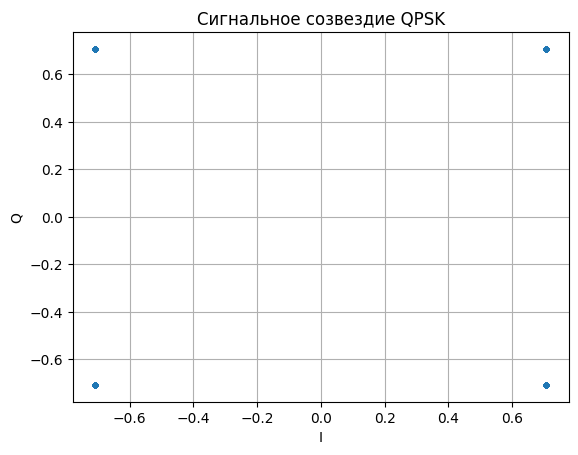

In [1]:
#Подключаем библиотеки numpy и matplotlib.pyplot.
import numpy as np
import matplotlib.pyplot as plt
num_symbols = 1000

x_int = np.random.randint(0, 4, num_symbols) # Создаем массив x_int, содержащий случайные целые числа от 0 до 3 (включая 0 и 3), длиной num_symbols.
x_degrees = x_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
x_radians = x_degrees*np.pi/180.0 # Создаем массив x_radians, в котором каждое число массива x_degrees умножается на значение числа Пи, и результат делится на 180.0. Таким образом, переводим градусы в радианы.
#Создаем массив x_symbols, в котором используем функции sin и cos библиотеки numpy для создания комплексных чисел типа QPSK (Quadrature Phase Shift Keying). 
#Действительная часть числа это cos(x_radians), а мнимая часть это sin(x_radians).
x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians) 
plt.plot(np.real(x_symbols), np.imag(x_symbols), '.')
plt.title("Сигнальное созвездие QPSK")
plt.xlabel("I")
plt.ylabel("Q")
plt.grid(True) 
plt.show()


Шума нет, поэтому все символы имеют одинаковое значение. Добавим АБГШ и затем поворот фазы.

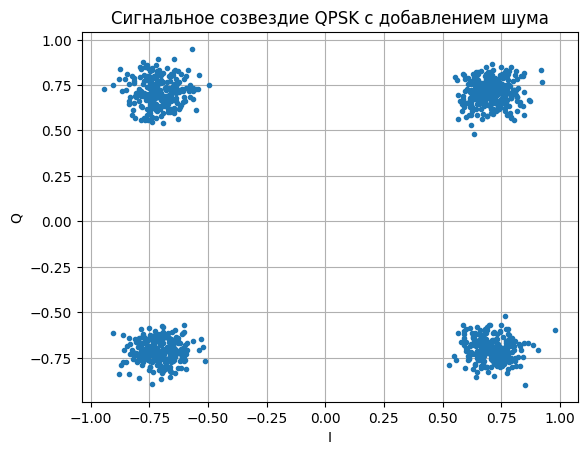

In [2]:
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.01
r = x_symbols + n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
plt.title("Сигнальное созвездие QPSK с добавлением шума")
plt.xlabel("I")
plt.ylabel("Q")
plt.grid(True)
plt.show()

Если в канале присутсвует шум, символы начинают пересекать границу (четыре квадранта) и будут интерпретироваться получателем как неправильный символ. Ниже представлено изменение кода с возможностью изменять `noise_power`

In [5]:
from ipywidgets import interact

num_symbols = 100
x_symbols = np.random.choice([-1, 1], num_symbols) + 1j*np.random.choice([-1, 1], num_symbols)

def plot_signal(noise_power):
    n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power 
    r = x_symbols + n * np.sqrt(noise_power) 
    plt.plot(np.real(r), np.imag(r), '.') 
    plt.title("Сигнальное созвездие QPSK с добавлением шума") 
    plt.xlabel("I") 
    plt.ylabel("Q") 
    plt.grid(True) 
    plt.show()

interact(plot_signal, noise_power=(0.01, 0.1, 0.01))

interactive(children=(FloatSlider(value=0.05, description='noise_power', max=0.1, min=0.01, step=0.01), Output…

<function __main__.plot_signal(noise_power)>

С увеличением мощности шума символы сильнее разносятся

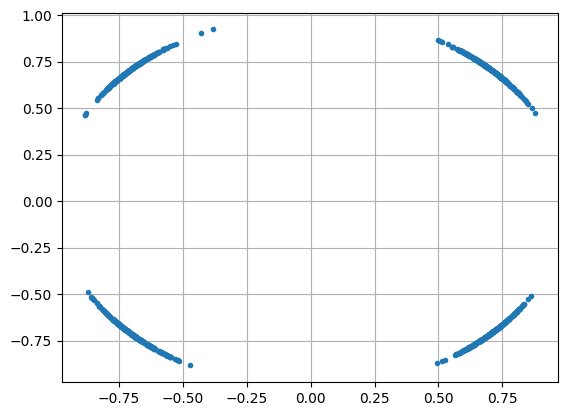

In [3]:

n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.01
phase_noise = np.random.randn(len(x_symbols)) * 0.1 # adjust multiplier for "strength" of phase noise
r = x_symbols * np.exp(1j*phase_noise) # поворот фазы
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

Пример использования QPSK с поворотом фазы pi/4, двоичным входом и наложением по Грею (Gray mapping)

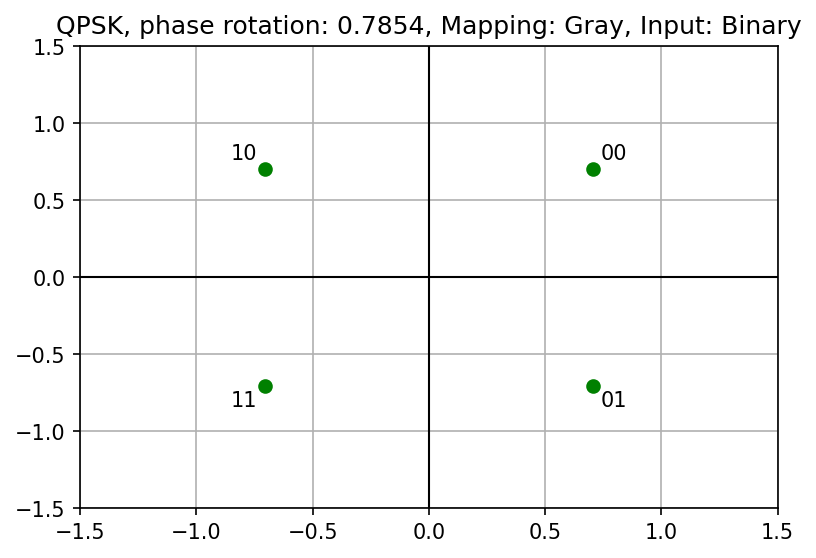

In [1]:
import numpy as np
from ModulationPy import PSKModem

modem = PSKModem(4, np.pi/4,
                 gray_map=True,
                 bin_input=True)
modem.plot_const()